In [147]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [148]:
# Create Engine to the local Sqlite database
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

In [106]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [107]:
#Create our session (link) from Python to the DB
session = Session(engine)

In [108]:
Base.classes.keys()

['measurement', 'station']

In [109]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [110]:
# Create our session (link) from Python to the DB
session = Session(engine)


## D1: Determine the Summary Statistics for June

In [119]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

                  date  tobs
date                        
2010-01-01  2010-01-01  65.0
2010-01-02  2010-01-02  63.0
2010-01-03  2010-01-03  74.0
2010-01-04  2010-01-04  76.0
2010-01-06  2010-01-06  73.0
...                ...   ...
2017-08-19  2017-08-19  71.0
2017-08-20  2017-08-20  78.0
2017-08-21  2017-08-21  76.0
2017-08-22  2017-08-22  76.0
2017-08-23  2017-08-23  76.0

[19550 rows x 2 columns]
June
              tobs
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.000000
max      85.000000


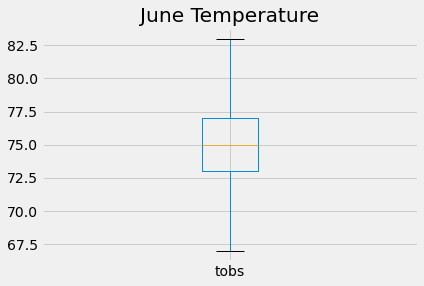

In [177]:
#setting the date range variables to encompass all data
first_date = dt.date(2010, 1, 1)
last_date = dt.date(2017, 8, 23)

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = []
results = session.query(Measurement.date, Measurement.tobs)
#print(results.all())
results.all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','tobs'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))
print(df)
# Sort the dataframe by date
df = df.sort_index()
#converting dtype (object) of date dtype to dateime64
df['date'] = pd.to_datetime(df['date'])

#create June dataframe and filter out nan
june_df = df[df['date'].dt.month==6]
junefil_df = june_df[~np.isnan(june_df['tobs'])]

#describe function for objective on statistics
print ('June')
print(junefil_df.describe())

#plotting it out
junefil_df.boxplot(column='tobs', showfliers=False).set_title('June Temperature')
plt.show()


## D2: Determine the Summary Statistics for December

                 date  tobs
date                       
2010-01-01 2010-01-01  65.0
2010-01-01 2010-01-01  72.0
2010-01-01 2010-01-01  75.0
2010-01-01 2010-01-01  70.0
2010-01-01 2010-01-01  66.0
...               ...   ...
2017-08-22 2017-08-22  76.0
2017-08-23 2017-08-23  81.0
2017-08-23 2017-08-23  82.0
2017-08-23 2017-08-23  82.0
2017-08-23 2017-08-23  76.0

[19550 rows x 2 columns]
December
              tobs
count  1517.000000
mean     71.041529
std       3.745920
min      56.000000
25%      69.000000
50%      71.000000
75%      74.000000
max      83.000000


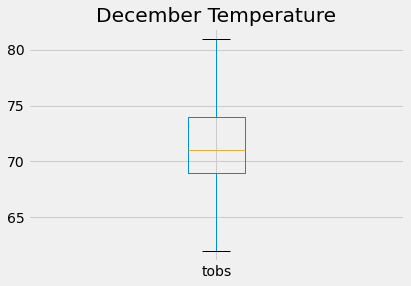

In [166]:
#setting the date range variables to encompass all data that we have
first_date = dt.date(2010, 1, 1)
last_date = dt.date(2017, 8, 23)

# Perform a query to retrieve the data and temperature scores
results = []
results = session.query(Measurement.date, Measurement.tobs)
#print(results.all())
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','tobs'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df = df.sort_index()
#converting dtype (object) of date dtype to dateime64
df['date'] = pd.to_datetime(df['date'])
#print(df['date'].dtype)
print(df)
#create December dataframe and filter out nan
dec_df = df[df['date'].dt.month==12]
decfil_df = dec_df[~np.isnan(dec_df['tobs'])]

#describe function for objective on statistics
print ('December')
print(decfil_df.describe())

#plotting it out
decfil_df.boxplot(column='tobs', showfliers=False).set_title('December Temperature')
plt.show()

                 date  tobs
date                       
2010-01-01 2010-01-01  65.0
2010-01-01 2010-01-01  72.0
2010-01-01 2010-01-01  75.0
2010-01-01 2010-01-01  70.0
2010-01-01 2010-01-01  66.0
...               ...   ...
2017-08-22 2017-08-22  76.0
2017-08-23 2017-08-23  81.0
2017-08-23 2017-08-23  82.0
2017-08-23 2017-08-23  82.0
2017-08-23 2017-08-23  76.0

[19550 rows x 2 columns]
August
              tobs
count  1622.000000
mean     76.412454
std       3.453138
min      65.000000
25%      74.000000
50%      76.000000
75%      79.000000
max      87.000000


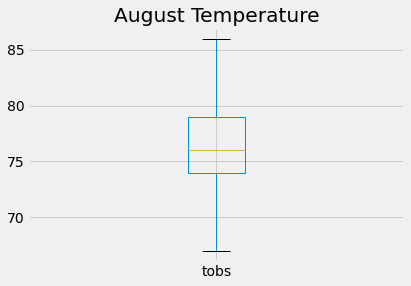

In [172]:
#setting the date range variables to encompass all data that we have
first_date = dt.date(2010, 1, 1)
last_date = dt.date(2017, 8, 23)

# Perform a query to retrieve the data and temperature scores
results = []
results = session.query(Measurement.date, Measurement.tobs)
#print(results.all())
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','tobs'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
#converting dtype (object) of date dtype to dateime64
df['date'] = pd.to_datetime(df['date'])
#print(df['date'].dtype)
print(df)
#create April dataframe and filter out nan
aug_df = df[df['date'].dt.month==8]
augfil_df = aug_df[~np.isnan(aug_df['tobs'])]

#describe function for objective on statistics
print ('August')
print(augfil_df.describe())

#plotting it out
augfil_df.boxplot(column='tobs', showfliers=False).set_title('August Temperature')
plt.show()

                 date  tobs
date                       
2010-01-01 2010-01-01  65.0
2010-01-01 2010-01-01  72.0
2010-01-01 2010-01-01  75.0
2010-01-01 2010-01-01  70.0
2010-01-01 2010-01-01  66.0
...               ...   ...
2017-08-22 2017-08-22  76.0
2017-08-23 2017-08-23  81.0
2017-08-23 2017-08-23  82.0
2017-08-23 2017-08-23  82.0
2017-08-23 2017-08-23  76.0

[19550 rows x 2 columns]
Feburary
              tobs
count  1610.000000
mean     69.442236
std       3.981399
min      56.000000
25%      67.000000
50%      70.000000
75%      72.000000
max      83.000000


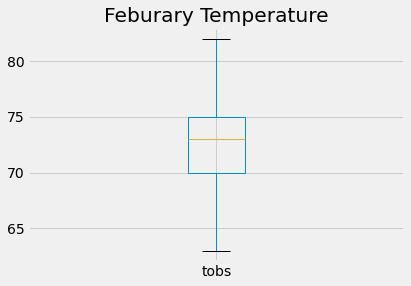

In [171]:
#setting the date range variables to encompass all data that we have
first_date = dt.date(2010, 1, 1)
last_date = dt.date(2017, 8, 23)

# Perform a query to retrieve the data and temperature scores
results = []
results = session.query(Measurement.date, Measurement.tobs)
#print(results.all())
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','tobs'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()

#converting dtype (object) of date dtype to dateime64
df['date'] = pd.to_datetime(df['date'])
#print(df['date'].dtype)
print(df)
#create Feb dataframe and filter out nan
feb_df = df[df['date'].dt.month==2]
febfil_df = feb_df[~np.isnan(feb_df['tobs'])]

#describe function for objective on statistics
print ('Feburary')
print(febfil_df.describe())

#plotting it out
aprfil_df.boxplot(column='tobs', showfliers=False).set_title('Feburary Temperature')
plt.show()

                 date  prcp
date                       
2010-01-01 2010-01-01  0.08
2010-01-01 2010-01-01  0.21
2010-01-01 2010-01-01  0.15
2010-01-01 2010-01-01  0.15
2010-01-01 2010-01-01  0.05
...               ...   ...
2017-08-22 2017-08-22  0.50
2017-08-23 2017-08-23  0.00
2017-08-23 2017-08-23  0.00
2017-08-23 2017-08-23  0.08
2017-08-23 2017-08-23  0.45

[19550 rows x 2 columns]
December
              prcp
count  1405.000000
mean      0.216819
std       0.541399
min       0.000000
25%       0.000000
50%       0.030000
75%       0.150000
max       6.420000


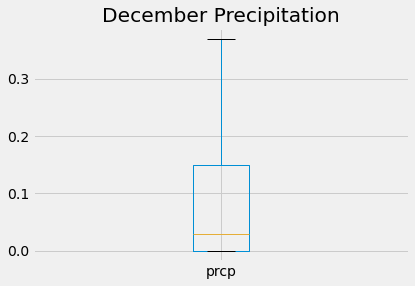

In [176]:
#setting the date range variables to encompass all data that we have
first_date = dt.date(2010, 1, 1)
last_date = dt.date(2017, 8, 23)

# Perform a query to retrieve the data and Precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','prcp'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))
df.head()
# Sort the dataframe by date
df = df.sort_index()
#converting dtype (object) of date dtype to dateime64
df['date'] = pd.to_datetime(df['date'])
#print(df['date'].dtype)
print(df)
#create December dataframe and filter out nan
dec_df = df[df['date'].dt.month==12]
decfil_df = dec_df[~np.isnan(dec_df['prcp'])]

#describe function for objective on statistics
print ('December')
print(decfil_df.describe())

#plotting it out
decfil_df.boxplot(column='prcp', showfliers=False).set_title('December Precipitation')
plt.show()

                 date  prcp
date                       
2010-01-01 2010-01-01  0.08
2010-01-01 2010-01-01  0.21
2010-01-01 2010-01-01  0.15
2010-01-01 2010-01-01  0.15
2010-01-01 2010-01-01  0.05
...               ...   ...
2017-08-22 2017-08-22  0.50
2017-08-23 2017-08-23  0.00
2017-08-23 2017-08-23  0.00
2017-08-23 2017-08-23  0.08
2017-08-23 2017-08-23  0.45

[19550 rows x 2 columns]
June
              prcp
count  1405.000000
mean      0.216819
std       0.541399
min       0.000000
25%       0.000000
50%       0.030000
75%       0.150000
max       6.420000


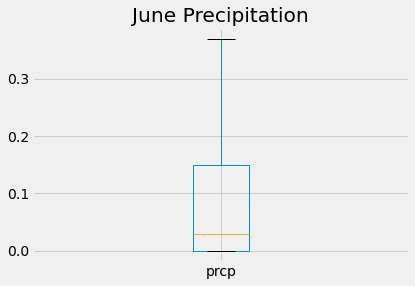

In [175]:
#setting the date range variables to encompass all data that we have
first_date = dt.date(2010, 1, 1)
last_date = dt.date(2017, 8, 23)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','prcp'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
#converting dtype (object) of date dtype to dateime64
df['date'] = pd.to_datetime(df['date'])
#print(df['date'].dtype)
print(df)
#create June dataframe and filter out nan
jun_df = df[df['date'].dt.month==6]
junfil_df = dec_df[~np.isnan(dec_df['prcp'])]

#describe function for objective on statistics
print ('June')
print(junfil_df.describe())

#plotting it out
junfil_df.boxplot(column='prcp', showfliers=False).set_title('June Precipitation')
plt.show()